**Objective:**
On the given dataset perform EDA with all the graphs learnt to find whether the patient will survive more than 5 years or less than 5 years using information such as patient's age, operation year and numbers of lymph nodes.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading data from the csv file and loading into a data-frame
df = pd.read_csv("haberman.csv")

**Basic information about dataset**

In [41]:
#Basic info about dataset
print(df.info())

#Data-points and featutres
print("\nShape: " + str(df.shape) + "\n")

#Column-names of the dataset
"""
Column-1 - "30" -> Age: The age at which patient undergone through surgery
Column-2 - "64" -> The operation year: The year at which patient undergone through surgery(1958-1969)
Column-3 - "1" -> Numbers of Lymph Nodes: Responsible for cancer
Column-4 - "1.1" -> "Survival Status" - If patient survived 5 or more years then its value will be 1, if less than 5 years 
then value will be 2
"""
print(df.columns)

#Changing column-names for better readability
df.rename(columns={'30': 'Patient\'s age', '64': 'Operation year', '1':'Lymph nodes', '1.1':'Survival status'}, inplace=True)
print(df.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None

Shape: (305, 4)

Index(['30', '64', '1', '1.1'], dtype='object')
Index(['Patient's age', 'Operation year', 'Lymph nodes', 'Survival status'], dtype='object')


In [42]:
#First 5 rows of dataset
df.head()

,Patient's age,Operation year,Lymph nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [43]:
#Basic statistics
df.describe()

,Patient's age,Operation year,Lymph nodes,Survival status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## **Univariate Analysis:**

### **Histogram, Probability Density Function (PDF)**

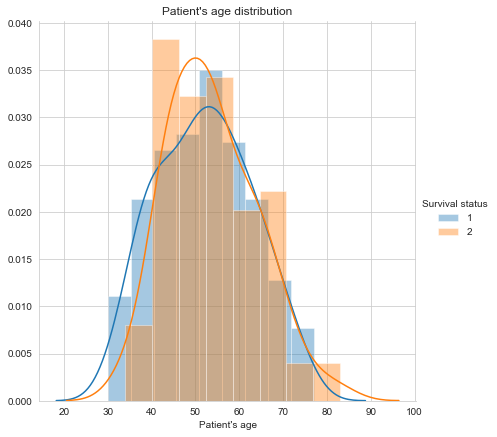

In [44]:
#Univariate Analysis of Patient's Age
sns.FacetGrid(df, hue="Survival status", height=6) \
   .map(sns.distplot, "Patient's age") \
   .add_legend()

plt.title("Patient's age distribution")
plt.show()

**Conclusion:**

1. As there is a huge overlap, we can say that Patient's age is not useful in finding the survival status of the patient.

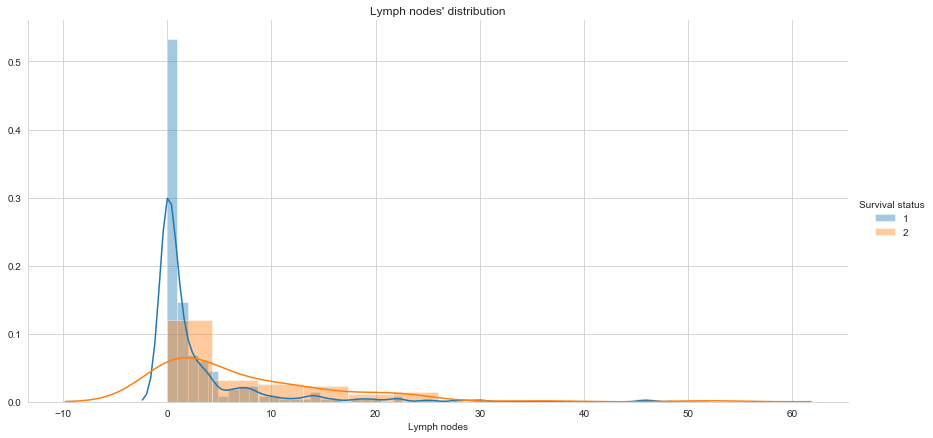

In [45]:
#Univariate Analysis of Lymph nodes

sns.FacetGrid(df, hue="Survival status", height=6, aspect=2) \
   .map(sns.distplot, "Lymph nodes") \
   .add_legend()

plt.title("Lymph nodes' distribution")
plt.show()

**Conclusion:**

1. We can not classify the survival status from number of lymph nodes but on a general note we can say that if lymph nodes are low then there is a good chance that the patient will survive more than 5 years.	

### **Cumulative Distribution Function (CDF)**

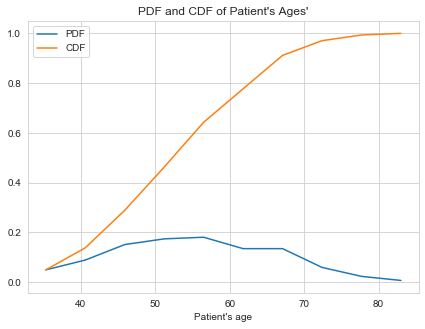

In [46]:
#CDF of Patient's Age

plt.figure(figsize=(7,5))
sns.set_style(style="whitegrid")

counts, bin_edges = np.histogram(df["Patient's age"], bins=10, density=False)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

sns.lineplot(bin_edges[1:], pdf, label="PDF")
sns.lineplot(bin_edges[1:], cdf, label="CDF")

plt.title("PDF and CDF of Patient's Ages'")
plt.xlabel("Patient's age")
plt.legend()
plt.show()

**Conclusion:**

1. This plot can be used to indetify percentage values of patients' age who have undergone through operations.

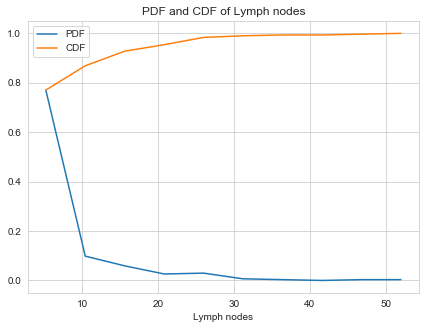

In [47]:
#CDF of Lymph nodes

plt.figure(figsize=(7,5))
sns.set_style(style="whitegrid")

counts, bin_edges = np.histogram(df["Lymph nodes"], bins=10, density=False)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

sns.lineplot(bin_edges[1:], pdf, label="PDF")
sns.lineplot(bin_edges[1:], cdf, label="CDF")

plt.title("PDF and CDF of Lymph nodes")
plt.xlabel("Lymph nodes")
plt.legend()
plt.show()

**Conclustion:**

1. Around 85% of patients has less than or equal to 10 numbers of lymph nodes.

### **Box-plot**

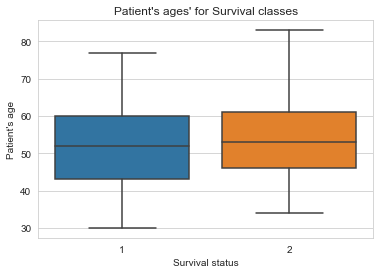

In [48]:
sns.boxplot(x="Survival status", y="Patient's age", data=df)

plt.title("Patient's ages' for Survival classes")
plt.show()

**Conclusion:**

1. Quantile values of patient's ages' who have survived 5 or more than 5 years (survival status=1) and who has survived less than 5 years (survival status=2), are almost same.

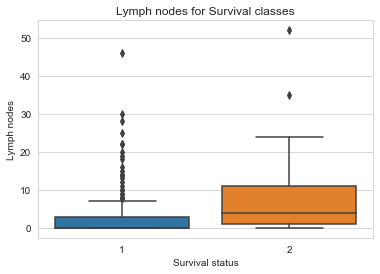

In [49]:
sns.boxplot(x="Survival status", y="Lymph nodes", data=df)

plt.title("Lymph nodes for Survival classes")
plt.show()

In [50]:
df_SurvivalStatus1 = df.loc[df["Survival status"] == 1]
df_SurvivalStatus2 = df.loc[df["Survival status"] == 2]

print(np.percentile(df_SurvivalStatus1["Lymph nodes"], 75))
print(np.percentile(df_SurvivalStatus2["Lymph nodes"], 75))

3.0
11.0


**Conclusion:**

1. 75% of the patients who have survived 5 or more than 5 years (survival status=1), has less than 3 numbers of lymph nodes.
2. 75% of the patients who have survived less than 5 years (survival status=2), has less than 11 numbers of lymph nodes.

### **Voilin-plot**

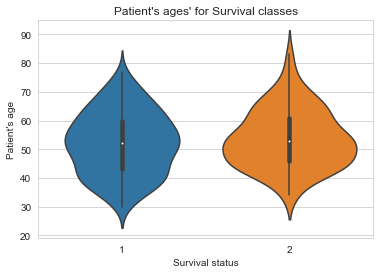

In [51]:
sns.violinplot(x="Survival status", y="Patient's age", data=df)

plt.title("Patient's ages' for Survival classes")
plt.show()

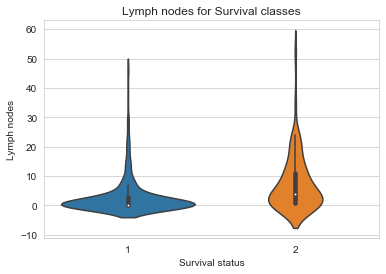

In [52]:
sns.violinplot(x="Survival status", y="Lymph nodes", data=df)

plt.title("Lymph nodes for Survival classes")
plt.show()

## **Bi-variate analysis:**

### **Scatter-plot**

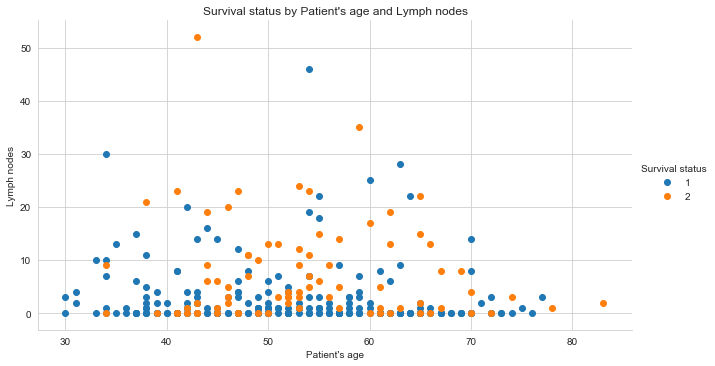

In [53]:
sns.FacetGrid(df, hue="Survival status", height=5, aspect=1.8) \
   .map(plt.scatter, "Patient's age", "Lymph nodes") \
   .add_legend()

plt.title("Survival status by Patient's age and Lymph nodes")
plt.show()

**Conclusion:**

1. A patient having age of less than 38 years and lymph nodes of less than 16, is more likely to survive 5 or more than 5 years. 

### **Pair-plots**

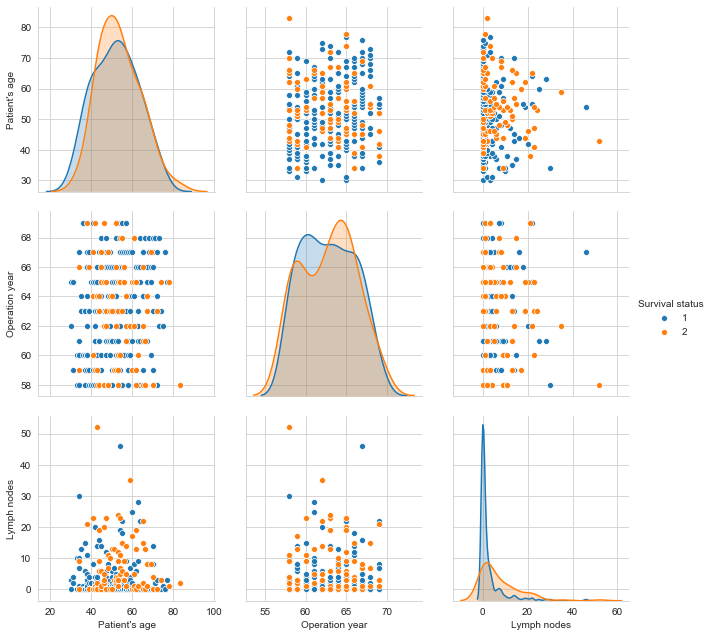

In [54]:
sns.pairplot(df, vars=["Patient's age", "Operation year", "Lymph nodes"], hue="Survival status", height=3)

plt.show()

**Conclusion:**

1. As we can see from these pair-plots and other plots as well, there is a huge overlap between Survival status 1 and 2 in each and every plot so we can not classify them from the given information.